In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [128]:
df = pd.read_csv('earl694412-infinite-matchhistory1124.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            432 non-null    object 
 1   Player          432 non-null    object 
 2   MatchId         432 non-null    object 
 3   Map             432 non-null    object 
 4   Category        432 non-null    object 
 5   Playlist        432 non-null    object 
 6   Input           432 non-null    object 
 7   Queue           432 non-null    object 
 8   Csr             432 non-null    int64  
 9   Mmr             1 non-null      float64
 10  Outcome         432 non-null    object 
 11  Accuracy        432 non-null    float64
 12  DamageDone      432 non-null    int64  
 13  DamageTaken     432 non-null    int64  
 14  ShotsFired      432 non-null    int64  
 15  ShotsLanded     432 non-null    int64  
 16  ShotsMissed     432 non-null    int64  
 17  KD              432 non-null    flo

In [129]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Damage/Kill'] = df['DamageDone'] / df['Kills']
df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'Csr', 'ShotsFired', 
              'ShotsMissed', 'ShotsLanded', 'Betrayals', 'Suicides',
                'ExpectedKills', 'ExpectedDeaths', 'Score', 'Perfects', 'Medals',
                'LengthSeconds'],axis=1)
dfR = df[df['Playlist'] == 'Ranked Arena']
dfRR = dfR[dfR['Date']> '2023-01-01']
dfRR = dfRR[dfRR['Outcome'] != 'Draw']
dfRR = dfRR[dfRR['Outcome'] != 'Left']
dfRR['Outcome'] = dfRR['Outcome'].map({'Win': 1, 'Loss': 0})
dfRR = dfRR.drop(['Date', 'Category', 'Playlist'], axis=1)
dfRR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 140 to 431
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Map            243 non-null    object 
 1   Outcome        243 non-null    int64  
 2   Accuracy       243 non-null    float64
 3   DamageDone     243 non-null    int64  
 4   DamageTaken    243 non-null    int64  
 5   KD             243 non-null    float64
 6   KDA            243 non-null    float64
 7   Kills          243 non-null    int64  
 8   Deaths         243 non-null    int64  
 9   Assists        243 non-null    int64  
 10  LengthMinutes  243 non-null    float64
 11  DamageRatio    243 non-null    float64
 12  Damage/Kill    243 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 26.6+ KB


In [130]:
def cnt(df, col):
    count = df[col].count()
    return count
def sm(df, col):
    sum = df[col].sum()
    return sum
def avg(df, col, val=None):
    avg = round(sm(df, col) / cnt(df, col),val)
    return avg


In [131]:
cols = ['Kills', 'Deaths', 'Assists', 'DamageDone', 'DamageTaken', 'DamageRatio']
dfRR.pivot_table(index='Map', columns='Outcome', aggfunc='mean', dropna=True)

Accuracy              Assists            Damage/Kill              \
Outcome            0          1         0          1           0           1   
Map                                                                            
Aquarius   51.900667  51.135000  7.400000   7.687500  347.305622  390.666843   
Argyle     48.978571  48.333333  4.857143   8.000000  392.549402  396.014550   
Empyrean   50.108333  48.970000  6.666667  10.333333  410.507647  433.174603   
Forbidden  49.930000  54.412000  4.000000   4.200000  496.835017  375.396166   
Live Fire  49.740000  53.627778  7.269231   6.555556  414.567828  358.269688   
Recharge   50.147727  49.680800  9.454545   9.280000  389.626345  358.480282   
Solitude   51.342692  51.026316  7.923077   8.947368  385.243969  364.945051   
Streets    54.075294  51.882174  8.176471   9.086957  396.091558  361.898460   

            DamageDone              DamageRatio            ...     Deaths  \
Outcome              0            1           0         1  ...          0   
Map                                                        ...              
Aquarius   5731.000000  4877.000000    1.228061  1.307557  ...  13.600000   
Argyle     4672.857143  4430.666667    1.298605  1.018249  ...  11.285714   
Empyrean   4894.666667  5139.333333    1.103064  1.315055  ...  12.333333   
Forbidden  3955.000000  5039.200000    1.321005  1.458859  ...  10.000000   
Live Fire  4709.192308  4370.962963    1.033055  1.196814  ...  14.153846   
Recharge   5591.863636  5172.160000    1.148708  1.246926  ...  14.272727   
Solitude   5374.846154  5154.263158    1.117722  1.279060  ...  14.269231   
Streets    5312.647059  4423.826087    1.123642  1.266960  ...  15.352941   

                            KD                 KDA                Kills  \
Outcome            1         0         1         0         1          0   
Map                                                                       
Aquarius    9.812500  1.292667  1.443125  6.130667  5.621875  17.266667   
Argyle     11.333333  1.145714  1.050000  3.047143  3.333333  12.714286   
Empyrean   12.000000  1.151667  0.996667  4.220000  2.776667  14.333333   
Forbidden   8.600000  1.353333  1.700000  2.000000  7.196000  10.666667   
Live Fire  10.000000  0.852308  1.577407  0.691923  5.071111  12.423077   
Recharge   11.880000  1.062273  1.443200  4.422273  6.251600  15.545455   
Solitude   10.578947  1.078846  1.513684  3.640000  7.243158  15.269231   
Streets     9.347826  1.005294  1.477391  2.312353  7.069130  14.941176   

                     LengthMinutes             
Outcome            1             0          1  
Map                                            
Aquarius   12.875000     11.238889   9.762500  
Argyle     12.000000      9.985714  11.394444  
Empyrean   11.333333     10.655556  10.566667  
Forbidden  14.400000      9.205556  10.140000  
Live Fire  12.888889      9.826923   9.334568  
Recharge   15.040000     11.129545  10.243333  
Solitude   14.842105     10.937821  10.042105  
Streets    13.391304     10.588235   8.920290  

[8 rows x 22 columns]

In [132]:
corr_mtrx = dfRR.corr().abs()
print(corr_mtrx['Outcome'].sort_values(ascending=False))

Outcome          1.000000
Deaths           0.382183
KD               0.322121
DamageTaken      0.263682
KDA              0.253865
DamageRatio      0.237279
LengthMinutes    0.157885
Damage/Kill      0.123284
DamageDone       0.119120
Kills            0.067456
Assists          0.056482
Accuracy         0.047302
Name: Outcome, dtype: float64


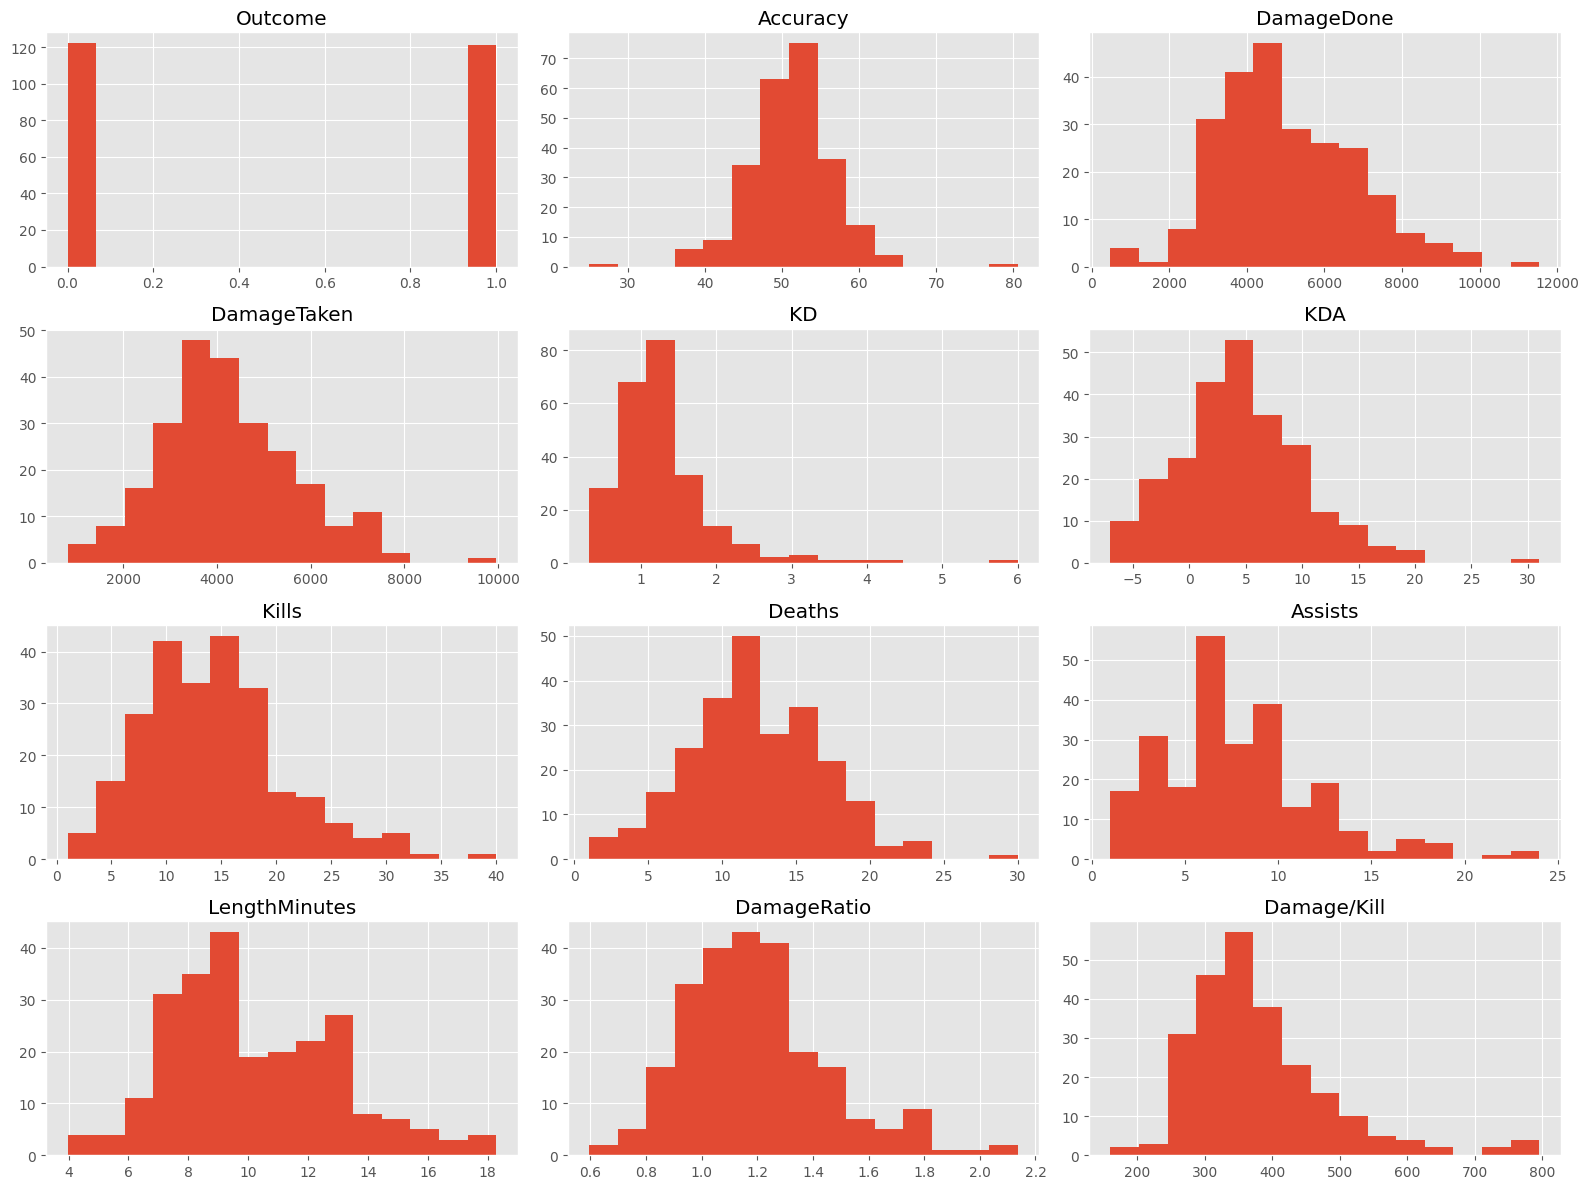

In [133]:
dfRR.hist(bins=15, figsize=(16, 12))
plt.tight_layout()
plt.show()

In [134]:
dfRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Outcome,243.0,0.497942,0.501028,0.000000,0.000000,0.000000,1.000000,1.000000
Accuracy,243.0,51.264897,5.551154,25.000000,48.150000,51.490000,54.260000,80.560000
DamageDone,243.0,4997.390947,1782.661665,480.000000,3752.500000,4669.000000,6183.000000,11536.000000
DamageTaken,243.0,4248.399177,1450.787094,807.000000,3325.500000,4028.000000,5106.500000,9962.000000
KD,243.0,1.268272,0.657483,0.310000,0.890000,1.180000,1.460000,6.000000
KDA,243.0,4.656461,5.660927,-7.000000,0.830000,4.660000,7.660000,31.000000
Kills,243.0,14.172840,6.469490,1.000000,10.000000,13.000000,18.000000,40.000000
Deaths,243.0,12.156379,4.702759,1.000000,9.000000,12.000000,15.000000,30.000000
Assists,243.0,7.925926,4.083158,1.000000,5.000000,7.000000,10.000000,24.000000
LengthMinutes,243.0,10.171331,2.813741,3.966667,8.200000,9.483333,12.408333,18.283333


In [135]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [136]:
# Define features (X) and target variable (y)
X = dfRR.drop('Outcome', axis=1) 
y = dfRR['Outcome'] 

print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

X Shape: (243, 12)
Y Shape: (243,)


In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Shape: {X_test.shape}')

X Train Shape: (194, 12)
X Test Shape: (49, 12)


In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['KD', 'KDA', 'Kills', 'Deaths', 'Assists', 'DamageDone', 'DamageTaken', 'DamageRatio']),
        ('cat', OneHotEncoder(), ['Map'])
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE_Histmean = mean_squared_error(y_test,np.full(y_test.shape,np.mean(y_train)))

def ResultsOut(model):
  y_pred = model.predict(X_test_preprocessed)
  # Calculate regression metrics
  acc = model.score(X_test_preprocessed, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  oosr2 = 1-mean_squared_error(y_test,y_pred)/MSE_Histmean
  # Print the metrics with newline characters
  print("Acc: {:.3f}".format(acc))
  print("MAE: {:.2f}".format(mae))
  print("MSE: {:.2f}".format(mse))
  print("RMSE: {:.2f}".format(rmse))
  print("R^2 Score: {:.2f}".format(r2))
  print("OOS R^2 Score: {:.2f}".format(oosr2))
  return ''

def paramResults(mod):
    results_df = pd.DataFrame({'param': mod.cv_results_["params"], 'Accuracy': mod.cv_results_["mean_test_score"]})

    # Splitting the 'param' column into separate columns
    params_df = pd.DataFrame(results_df['param'].to_list())
    params_df.columns = [f"{col}_param" for col in params_df.columns]

    # Concatenating the new columns with the 'Accuracy' column
    results_df = pd.concat([params_df, results_df['Accuracy']], axis=1)

    # Displaying the updated DataFrame
    print(results_df)
    return ''

def featImport(mod):
    feat_importances = pd.DataFrame(mod.best_estimator_.feature_importances_[:14], index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))
    plt.show()

## Logistic Regression

In [140]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_preprocessed, y_train)

print(f'Unregularized Logistic Regression Accuracy: {logreg.score(X_test_preprocessed, y_test)}')
print(ResultsOut(logreg))

Unregularized Logistic Regression Accuracy: 0.7551020408163265
Acc: 0.755
MAE: 0.24
MSE: 0.24
RMSE: 0.49
R^2 Score: 0.00
OOS R^2 Score: 0.03



## Ridge

In [141]:
# Ridge
# Need to find best params for param grid

C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2]

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5)
ridge_cv.fit(X_train_preprocessed,y_train)

print(ridge_cv.best_estimator_)
print(f'Ridge Accuracy: {ridge_cv.score(X_test_preprocessed, y_test)}')
ridge_cv.cv_results_
paramResults(ridge_cv)

LogisticRegression(C=0.01, solver='saga')
Ridge Accuracy: 0.7142857142857143
   C_param  Accuracy
0    0.001  0.593252
1    0.010  0.731849
2    0.100  0.706208
3    1.000  0.685830
4   10.000  0.690958
5  100.000  0.690958


''

In [142]:
ResultsOut(ridge_cv)

Acc: 0.714
MAE: 0.29
MSE: 0.29
RMSE: 0.53
R^2 Score: -0.17
OOS R^2 Score: -0.13


''

## Lasso

In [143]:
# Lasso

param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5)
lasso_cv.fit(X_train_preprocessed,y_train)

print(lasso_cv.best_estimator_)
print(f'Lasso Accuracy: {lasso_cv.score(X_test_preprocessed, y_test)}')
lasso_cv.cv_results_
paramResults(lasso_cv)


LogisticRegression(C=10, penalty='l1', solver='saga')
Lasso Accuracy: 0.7346938775510204
   C_param  Accuracy
0    0.001  0.515520
1    0.010  0.510391
2    0.100  0.695816
3    1.000  0.695951
4   10.000  0.696086
5  100.000  0.690958


''

In [144]:
ResultsOut(lasso_cv)

Acc: 0.735
MAE: 0.27
MSE: 0.27
RMSE: 0.52
R^2 Score: -0.08
OOS R^2 Score: -0.05


''

## ElasticNet

In [145]:
# ElasticNet

param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                            param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_preprocessed,y_train)

print(elastic_cv.best_estimator_)
print(f'ElasticNet Accuracy: {elastic_cv.score(X_test_preprocessed, y_test)}')
elastic_cv.cv_results_
paramResults(elastic_cv)

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga')
ElasticNet Accuracy: 0.7755102040816326
    C_param  l1_ratio_param  Accuracy
0     0.001            0.25  0.505263
1     0.001            0.50  0.499865
2     0.001            0.75  0.515520
3     0.010            0.25  0.536167
4     0.010            0.50  0.515520
5     0.010            0.75  0.504993
6     0.100            0.25  0.716329
7     0.100            0.50  0.726586
8     0.100            0.75  0.706208
9     1.000            0.25  0.696086
10    1.000            0.50  0.685695
11    1.000            0.75  0.685695
12   10.000            0.25  0.690958
13   10.000            0.50  0.690958
14   10.000            0.75  0.690958
15  100.000            0.25  0.690958
16  100.000            0.50  0.690958
17  100.000            0.75  0.690958


''

In [146]:
ResultsOut(elastic_cv)

Acc: 0.776
MAE: 0.22
MSE: 0.22
RMSE: 0.47
R^2 Score: 0.08
OOS R^2 Score: 0.11


''

## K-Nearest Neighbours

In [147]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,50,3))
param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knn_cv.fit(X_train_preprocessed,y_train)

print(knn_cv.best_estimator_)
print(f'K-Nearest Neighbors Accuracy: {knn_cv.score(X_test_preprocessed, y_test)}')
knn_cv.cv_results_
paramResults(knn_cv)

KNeighborsClassifier(n_neighbors=40)
K-Nearest Neighbors Accuracy: 0.7346938775510204
    n_neighbors_param  Accuracy
0                   1  0.562348
1                   4  0.660054
2                   7  0.593117
3                  10  0.654656
4                  13  0.639271
5                  16  0.690823
6                  19  0.660054
7                  22  0.706208
8                  25  0.690688
9                  28  0.685695
10                 31  0.685560
11                 34  0.690688
12                 37  0.700945
13                 40  0.726856
14                 43  0.716464
15                 46  0.690823
16                 49  0.711201


''

In [148]:
ResultsOut(knn_cv)

Acc: 0.735
MAE: 0.27
MSE: 0.27
RMSE: 0.52
R^2 Score: -0.08
OOS R^2 Score: -0.05


''

## Random Forest

In [149]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [10, 15, 20]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=42069,max_features='sqrt'),
                                                     cv=5, param_grid=param_grid_rf,n_jobs=-1)
rf_cv.fit(X_train_preprocessed, y_train)

print(rf_cv.best_estimator_)
print(f'Random Forest Accuracy: {rf_cv.score(X_test_preprocessed, y_test)}')
rf_cv.cv_results_
paramResults(rf_cv)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42069)
Random Forest Accuracy: 0.6938775510204082
   max_depth_param  n_estimators_param  Accuracy
0               10                 100  0.649123
1               10                 300  0.664777
2               10                 500  0.659649
3               15                 100  0.654251
4               15                 300  0.659649
5               15                 500  0.659649
6               20                 100  0.654251
7               20                 300  0.664777
8               20                 500  0.659649


''

In [150]:
ResultsOut(rf_cv)

Acc: 0.694
MAE: 0.31
MSE: 0.31
RMSE: 0.55
R^2 Score: -0.25
OOS R^2 Score: -0.21


''

<AxesSubplot: >

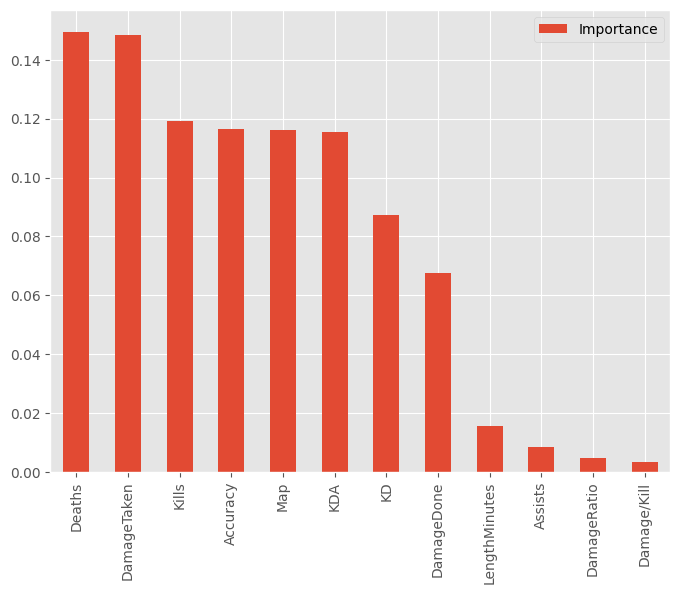

In [151]:
feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_[:12], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosted Trees

In [152]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.01,0.1],'max_depth': [2,4,6], 'subsample': [0.5,1]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42069),
                    cv=5, param_grid=param_grid_gbrt,n_jobs=-1)
GBRT.fit(X_train_preprocessed, y_train)

print(GBRT.best_estimator_)
print(f'Gradient Boosed Trees Accuracy: {GBRT.score(X_test_preprocessed, y_test)}')
GBRT.cv_results_
paramResults(GBRT)

GradientBoostingClassifier(max_depth=6, random_state=42069, subsample=0.5)
Gradient Boosed Trees Accuracy: 0.6938775510204082
    learning_rate_param  max_depth_param  n_estimators_param  subsample_param  \
0                  0.01                2                 100              0.5   
1                  0.01                2                 100              1.0   
2                  0.01                2                 300              0.5   
3                  0.01                2                 300              1.0   
4                  0.01                2                 500              0.5   
5                  0.01                2                 500              1.0   
6                  0.01                4                 100              0.5   
7                  0.01                4                 100              1.0   
8                  0.01                4                 300              0.5   
9                  0.01                4                 300    

''

In [153]:
ResultsOut(GBRT)

Acc: 0.694
MAE: 0.31
MSE: 0.31
RMSE: 0.55
R^2 Score: -0.25
OOS R^2 Score: -0.21


''

<AxesSubplot: >

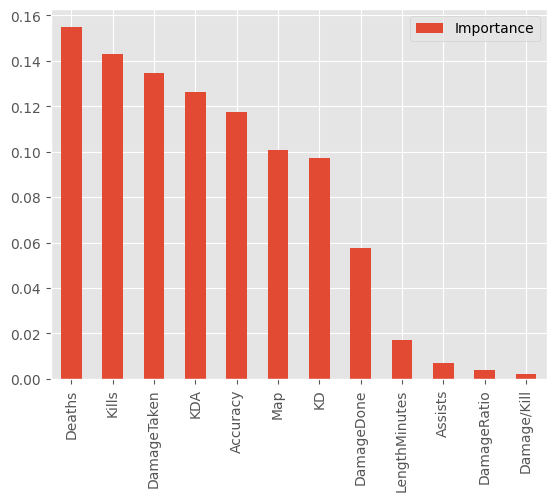

In [154]:
feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_[:12], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## XGBoost

In [155]:
from xgboost import XGBClassifier

param_grid_xgb = {'n_estimators': [25,50,100,150,200,250,300],'learning_rate': [0.001,0.01,0.1],'max_depth': [1,3,5,7,9]}
XGB = GridSearchCV(estimator=XGBClassifier(random_state=42069), cv=5, param_grid=param_grid_xgb,n_jobs=-1)
XGB.fit(X_train_preprocessed, y_train)

print(XGB.best_estimator_)
print(f'XGBoost Accuracy: {XGB.score(X_test_preprocessed, y_test)}')
paramResults(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42069, ...)
XGBoost Accuracy: 0.6530612244897959
     learning_rate_param  max_depth_param  n_estimators_param  Accuracy
0                  0.001                1                  25  0.659919
1                  0.001                1                  50  0.65991

''

In [156]:
ResultsOut(XGB)

Acc: 0.653
MAE: 0.35
MSE: 0.35
RMSE: 0.59
R^2 Score: -0.42
OOS R^2 Score: -0.37


''

<AxesSubplot: >

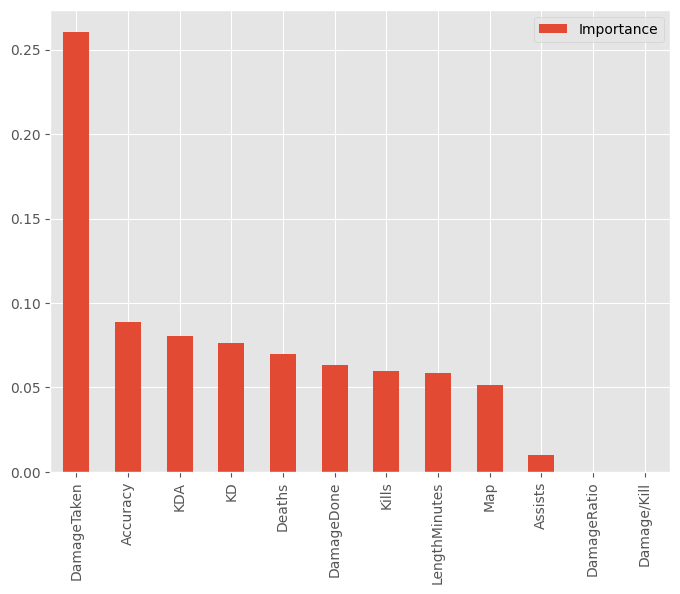

In [157]:
feat_importances = pd.DataFrame(XGB.best_estimator_.feature_importances_[:12], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

,Model,ACC,MAE,MSE,RMSE,R2,OOS R2
0,ElasticNet,0.776,0.224,0.224,0.474,0.083,0.111
1,Logistic Regression,0.755,0.245,0.245,0.495,0.000,0.030
2,Lasso,0.735,0.265,0.265,0.515,-0.083,-0.051
3,K-Nearest Neighbors,0.735,0.265,0.265,0.515,-0.083,-0.051
4,Ridge,0.714,0.286,0.286,0.535,-0.167,-0.132
5,Random Forest,0.694,0.306,0.306,0.553,-0.250,-0.213
6,Gradient Boosted Trees,0.694,0.306,0.306,0.553,-0.250,-0.213
7,XGBoost,0.653,0.347,0.347,0.589,-0.417,-0.374


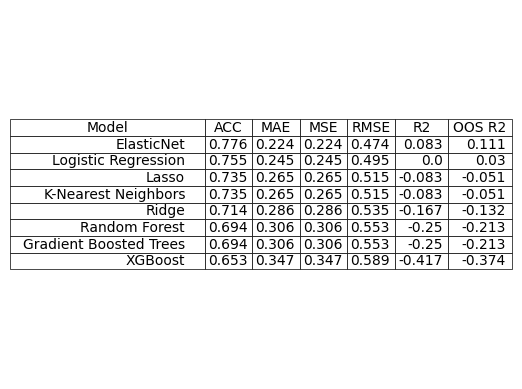

In [160]:
modelss = [logreg,ridge_cv,lasso_cv,elastic_cv,knn_cv,rf_cv,GBRT,XGB]
model_namess = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet',
              'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosted Trees', 'XGBoost']
def saveResults(models, model_names):
    # Initialize an empty dataframe to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'ACC' ,'MAE', 'MSE', 'RMSE', 'R2', 'OOS R2'])
    
    # Loop through each model and calculate the metrics
    for i, model in enumerate(models):
        # Generate predictions on the test set
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate regression metrics
        acc = round(model.score(X_test_preprocessed, y_test),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)
        mse = round(mean_squared_error(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        r2 = round(r2_score(y_test, y_pred),3)
        oosr2 = round(1-mean_squared_error(y_test,y_pred)/MSE_Histmean,3)
        
        # Add metrics to the dataframe
        metrics_df.loc[i] = [model_names[i],acc, mae, mse, rmse, r2, oosr2]
    
    metrics_df = metrics_df.sort_values('ACC', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots()
    table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                     cellLoc='right', loc='center')
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
    ax.axis('off')
    plt.savefig('Model Results.png', dpi=300, bbox_inches='tight')
    
    return metrics_df

saveResults(modelss,model_namess)